In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [3]:
train = pd.read_csv('C:/Users/hp/Desktop/train.csv')
test = pd.read_csv('C:/Users/hp/Desktop/test.csv')

In [4]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [9]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

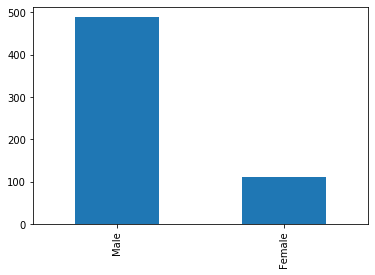

In [11]:
train['Gender'].value_counts().plot.bar()

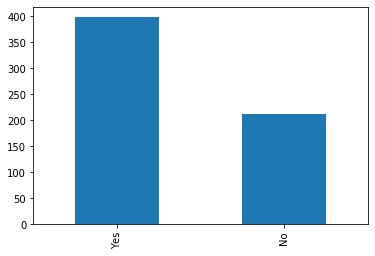

In [12]:
train['Married'].value_counts().plot.bar()

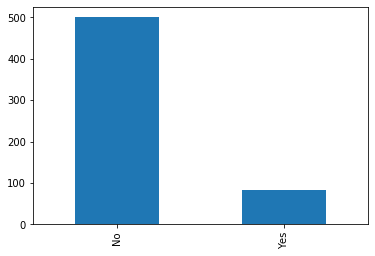

In [13]:
train['Self_Employed'].value_counts().plot.bar()

In [20]:
train.drop(['Loan_ID'],axis=1,inplace=True)
test.drop(['Loan_ID'],axis=1,inplace=True)

In [16]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
combined = train.append(test)

In [ ]:
combined.drop(['Married'],axis=1,inplace=True)

In [46]:
combined.head()

,Credit_History,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Property_Area,Self_Employed,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio
0,1.0,1,1,126.0,360.0,Y,Urban,0,0,0,0,5849.0,46.420635
1,1.0,1,1,128.0,360.0,N,Rural,0,1,0,0,6091.0,47.585938
2,1.0,1,1,66.0,360.0,Y,Urban,1,0,0,0,3000.0,45.454545
3,1.0,0,1,120.0,360.0,Y,Urban,0,0,0,0,4941.0,41.175000
4,1.0,1,1,141.0,360.0,Y,Urban,0,0,0,0,6000.0,42.553191


In [23]:
combined.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


In [47]:
combined.isnull().sum()

Credit_History         0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_Status          367
Property_Area          0
Self_Employed          0
Singleton              0
Small_Family           0
Large_Family           0
Total_Income           0
Debt_Income_Ratio      0
dtype: int64

In [42]:
combined['Gender'].fillna('Male', inplace=True)
combined['Self_Employed'].fillna('No', inplace=True)
combined['LoanAmount'].fillna(combined['LoanAmount'].median(), inplace=True)
combined['Credit_History'].fillna(2, inplace=True)

In [26]:
combined['Gender'] = combined['Gender'].map({'Male':1,'Female':0})

In [28]:
combined['Singleton'] = combined['Dependents'].map(lambda d: 1 if d=='1' else 0)
combined['Small_Family'] = combined['Dependents'].map(lambda d: 1 if d=='2' else 0)
combined['Large_Family'] = combined['Dependents'].map(lambda d: 1 if d=='3+' else 0)
combined.drop(['Dependents'], axis=1, inplace=True)

In [29]:
combined['Education'] = combined['Education'].map({'Graduate':1,'Not Graduate':0})

In [30]:
combined['Self_Employed'] = combined['Self_Employed'].map({'Yes':1,'No':0})

In [31]:
combined['Total_Income'] = combined['ApplicantIncome'] + combined['CoapplicantIncome']
combined.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [32]:
combined['Debt_Income_Ratio']=combined['Total_Income']/combined['LoanAmount']

In [33]:
combined['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [34]:
combined['Loan_Amount_Term'].fillna(360.0, inplace=True)

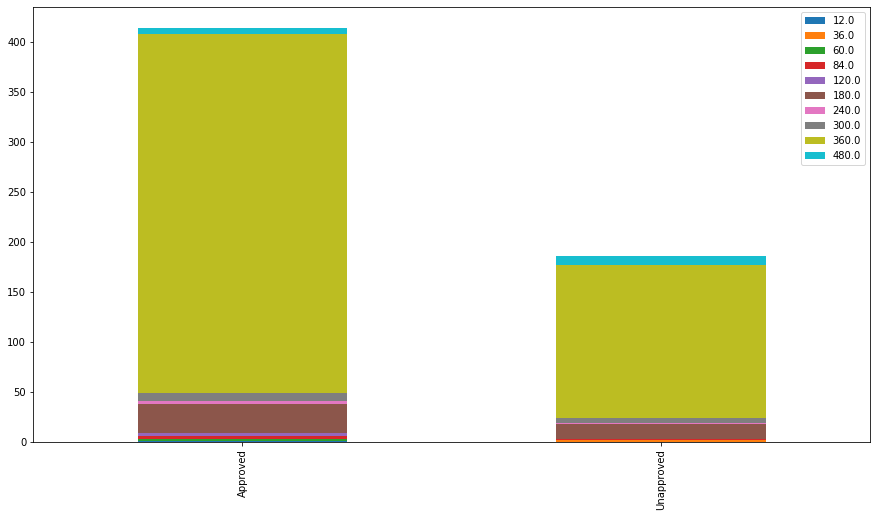

In [49]:
approved =train[train['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts()
unapproved= train[train['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
pl = pd.DataFrame([approved,unapproved])
pl.index = ['Approved','Unapproved']
pl.plot(kind='bar', stacked=True, figsize=(15,8))

In [50]:
combined['Very_Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
combined['Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
combined['Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
combined['Very_Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
combined.drop('Loan_Amount_Term', axis=1, inplace=True)

In [51]:
combined['Credit_History_Bad'] = combined['Credit_History'].map(lambda c: 1 if c==0 else 0)
combined['Credit_History_Good'] = combined['Credit_History'].map(lambda c: 1 if c==1 else 0)
combined['Credit_History_Unknown'] = combined['Credit_History'].map(lambda c: 1 if c==2 else 0)
combined.drop('Credit_History', axis=1, inplace=True)

In [52]:
property_dummies = pd.get_dummies(combined['Property_Area'], prefix='Property')
combined = pd.concat([combined, property_dummies], axis=1)
combined.drop('Property_Area', axis=1, inplace=True)

In [53]:
def fengineering(df):
    df -= df.min()
    df /= df.max()
    return df

In [54]:
combined['LoanAmount'] = fengineering(combined['LoanAmount'])
combined['Total_Income'] = fengineering(combined['Total_Income'])
combined['Debt_Income_Ratio'] = fengineering(combined['Debt_Income_Ratio'])

In [55]:
combined.head()

,Education,Gender,LoanAmount,Loan_Status,Self_Employed,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
0,1,1,0.169320,Y,0,0,0,0,0.055394,0.071120,0,0,0,1,0,1,0,0,0,1
1,1,1,0.172214,N,0,1,0,0,0.058435,0.073382,0,0,0,1,0,1,0,1,0,0
2,1,1,0.082489,Y,1,0,0,0,0.019583,0.069245,0,0,0,1,0,1,0,0,0,1
3,0,1,0.160637,Y,0,0,0,0,0.043980,0.060939,0,0,0,1,0,1,0,0,0,1
4,1,1,0.191027,Y,0,0,0,0,0.057292,0.063614,0,0,0,1,0,1,0,0,0,1


In [57]:
combined.head()

,Education,Gender,LoanAmount,Self_Employed,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
0,1,1,0.169320,0,0,0,0,0.055394,0.071120,0,0,0,1,0,1,0,0,0,1
1,1,1,0.172214,0,1,0,0,0.058435,0.073382,0,0,0,1,0,1,0,1,0,0
2,1,1,0.082489,1,0,0,0,0.019583,0.069245,0,0,0,1,0,1,0,0,0,1
3,0,1,0.160637,0,0,0,0,0.043980,0.060939,0,0,0,1,0,1,0,0,0,1
4,1,1,0.191027,0,0,0,0,0.057292,0.063614,0,0,0,1,0,1,0,0,0,1


In [58]:
Y=train['Loan_Status'].map({'Y':1,'N':0})

In [59]:
X=combined.head(614)
X.head()

,Education,Gender,LoanAmount,Self_Employed,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
0,1,1,0.169320,0,0,0,0,0.055394,0.071120,0,0,0,1,0,1,0,0,0,1
1,1,1,0.172214,0,1,0,0,0.058435,0.073382,0,0,0,1,0,1,0,1,0,0
2,1,1,0.082489,1,0,0,0,0.019583,0.069245,0,0,0,1,0,1,0,0,0,1
3,0,1,0.160637,0,0,0,0,0.043980,0.060939,0,0,0,1,0,1,0,0,0,1
4,1,1,0.191027,0,0,0,0,0.057292,0.063614,0,0,0,1,0,1,0,0,0,1


In [60]:
X_test=combined.iloc[614:]

In [61]:
combined.head()

,Education,Gender,LoanAmount,Self_Employed,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
0,1,1,0.169320,0,0,0,0,0.055394,0.071120,0,0,0,1,0,1,0,0,0,1
1,1,1,0.172214,0,1,0,0,0.058435,0.073382,0,0,0,1,0,1,0,1,0,0
2,1,1,0.082489,1,0,0,0,0.019583,0.069245,0,0,0,1,0,1,0,0,0,1
3,0,1,0.160637,0,0,0,0,0.043980,0.060939,0,0,0,1,0,1,0,0,0,1
4,1,1,0.191027,0,0,0,0,0.057292,0.063614,0,0,0,1,0,1,0,0,0,1


In [62]:
classification=RandomForestClassifier(n_estimators=50, max_features='sqrt')

In [67]:
train.drop(['Married'],axis=1,inplace=True)

In [63]:
classification=classification.fit(X,Y)

In [81]:
xval = cross_val_score(classification, X, Y, cv = 5, scoring='accuracy')


In [82]:
xval

array([0.79032258, 0.78225806, 0.75409836, 0.82786885, 0.79508197])